<a href="https://colab.research.google.com/github/AashRoxx/Data_science_projects/blob/main/Heart_disease/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


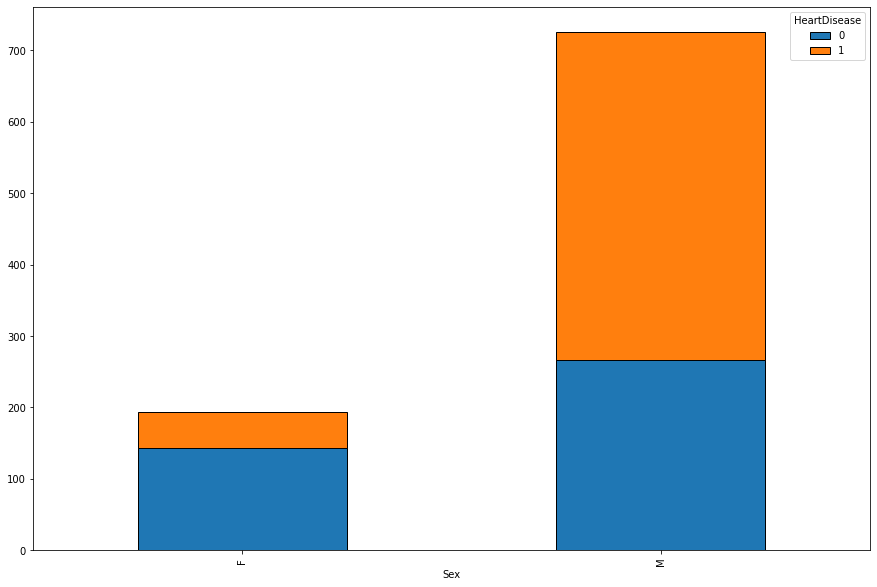

In [ ]:
state_cmp=df.groupby(['Sex','HeartDisease']).size().unstack()
state_cmp.plot.bar(stacked=True,figsize=(15,10),edgecolor='black')
plt.show()

This shows us that when we compare the data where blue represents people suffering with no heart disease and yellow represnting people suffering from it . That females have a lesser chance of getting heart diseases.

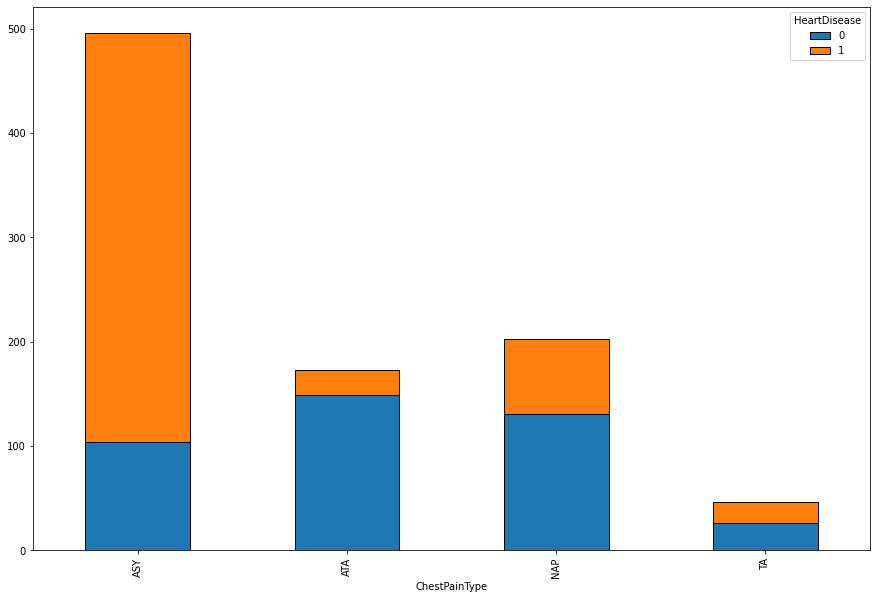

In [ ]:
chst=df.groupby(['ChestPainType','HeartDisease']).size().unstack()
chst.plot.bar(stacked=True,figsize=(15,10),edgecolor='black')
plt.show()

This is comparing the chest pain type the patient suffers from and the chances they have a heart disease.

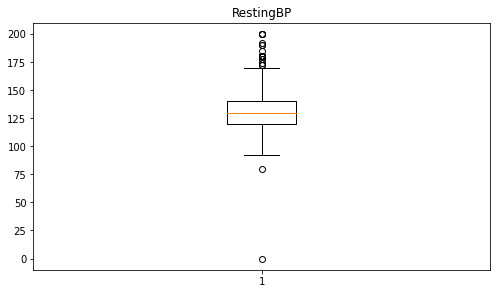

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('RestingBP')
plt.boxplot(df['RestingBP'])
plt.show()

In [ ]:
df = df[df['RestingBP']>0]
#removing record with 0 as bp since its not possible

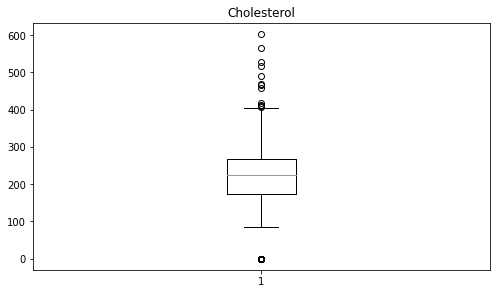

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,2)
plt.title('Cholesterol')
plt.boxplot(df['Cholesterol'])
plt.show()

In [ ]:
df['Cholesterol'] = df['Cholesterol'].apply(lambda x : 244.6 if x == 0 else x)
#too many values with cholestrol =0 replacing it with average as its inaccurate

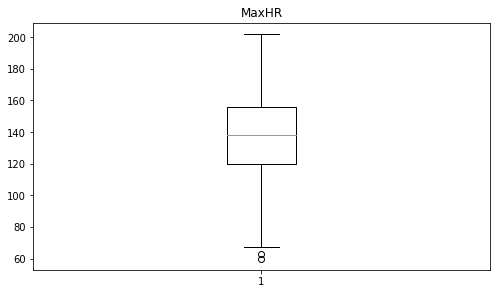

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,4)
plt.title('MaxHR')
plt.boxplot(df['MaxHR'])

plt.show()
#not much to change pretty good values

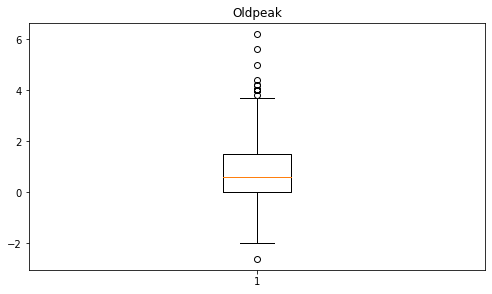

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,4)
plt.title('Oldpeak')
plt.boxplot(df['Oldpeak'])
plt.show()

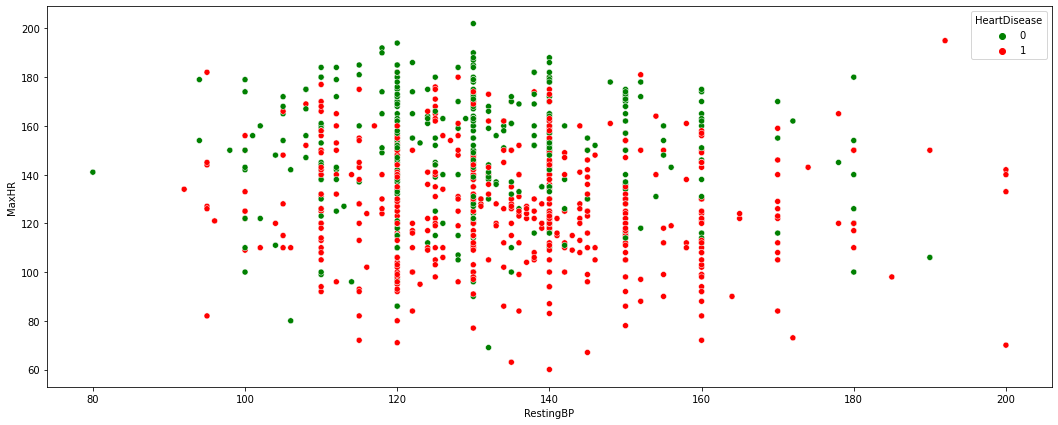

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='RestingBP',y='MaxHR',data=df,hue='HeartDisease',palette=['green','red'])
plt.show()
#relatiomship between them using scatterplot

low MaxHR  increases the chances of having a heart disease

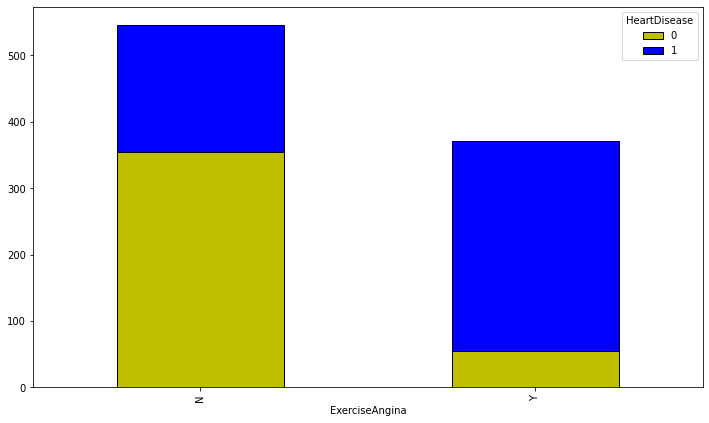

In [ ]:
rest=df.groupby(['ExerciseAngina','HeartDisease']).size().unstack()
rest.plot.bar(stacked=True,figsize=(12,7),color=['y','b'],edgecolor='black')
plt.show()
#relationship between Exercise angina and heart disease

People suffering from Excercise angina have a higher chance of having heart diseases.

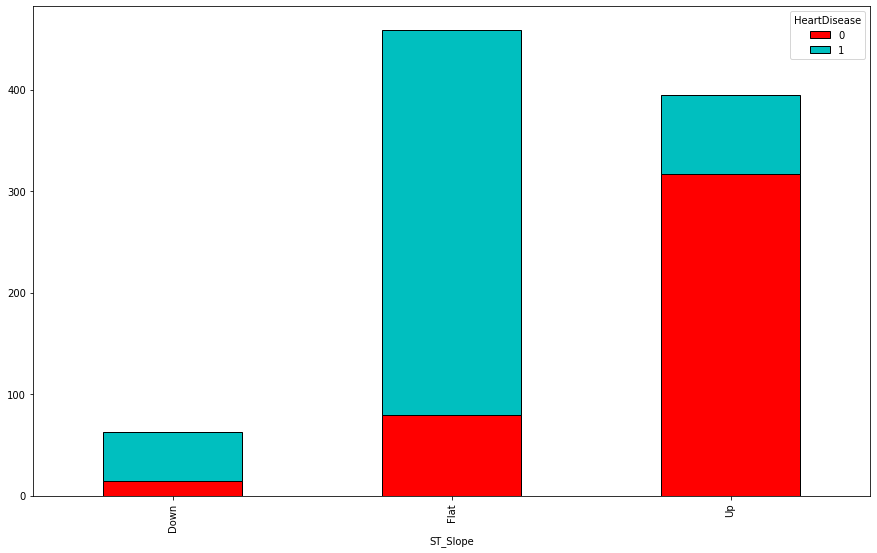

In [ ]:
ST=df.groupby(['ST_Slope','HeartDisease']).size().unstack()
ST.plot.bar(stacked=True,figsize=(15,9),color=['r','c'],edgecolor='black')
plt.show()
#Relationship between ST slope and heart disease

From the given bar graph  we can see that the chance of having a heart disease is maximum when the ST slope is flat or down

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.1+ KB


In [ ]:
#We analysed impact of columns on heart disease.Now convert object columns to numeric
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'M' else 0)
df['ExerciseAngina'] = df['ExerciseAngina'].apply(lambda x : 1 if x == 'Y' else 0)

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['ChestPainType'] = lb.fit_transform(df['ChestPainType'])
df['RestingECG'] = lb.fit_transform(df['RestingECG'])
t = {'Down':0,'Flat':1,'Up':2}
df['ST_Slope'] = df['ST_Slope'].map(t)

In [ ]:
#Splitting the dataset into the Training set and Test set
X= df.drop('HeartDisease',axis=1)
Y = df.HeartDisease
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state = 50)

In [ ]:
classifier = DecisionTreeClassifier(max_depth = 5,criterion='entropy',min_samples_leaf=3,splitter='random',class_weight='balanced')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_ptrain = classifier.predict(x_train)
#DescisionTree algorithm

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       128
           1       0.82      0.82      0.82       148

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276



In [ ]:
print(classification_report(y_train,y_ptrain))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       282
           1       0.89      0.91      0.90       359

    accuracy                           0.88       641
   macro avg       0.88      0.88      0.88       641
weighted avg       0.88      0.88      0.88       641



81% test accuracy and 88% train accuracy

Using Xgboost to improve accuracy

In [ ]:
xg = XGBClassifier(max_depth=3,n_estimators=10,learning_rate=0.9,subsample=0.7,min_child_weight=0.25,gamma=1,colsample_bytree=0.7,scale_pos_weight=1)
xg.fit(x_train,y_train)
print(xg.score(x_train,y_train))
print(xg.score(x_test,y_test))

0.9079563182527302
0.8442028985507246


In [ ]:
y_predtest = xg.predict(x_test)
y_ptest = xg.predict(x_train)
print(classification_report(y_test,y_predtest))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       128
           1       0.85      0.86      0.86       148

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [ ]:
print(classification_report(y_train,y_ptest))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       282
           1       0.90      0.94      0.92       359

    accuracy                           0.91       641
   macro avg       0.91      0.90      0.91       641
weighted avg       0.91      0.91      0.91       641



84% test accuracy and 91% train accuracy